In [2]:
import importlib
import dbops
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [3]:
importlib.reload(dbops)  # Reload the module from source

<module 'dbops' from '/scratch/u1319464/Data-Mining-Spring-2025-Project/dbops.py'>

In [4]:
for movie_ref in dbops.Movie.iterate_all_movies():
    imdb_id = movie_ref.get_imdb_id()
    title = movie_ref.get_title()
    frame_idx_timeline = []
    num_faces_timeline = []
    color_timeline = []
    for frame_ref in tqdm(movie_ref.iterate_frames()):
        # if not frame_ref.is_fully_cached():
        #     print(f'Uncached frame found: {frame_ref.frame_index}')
        
        frame_idx_timeline.append(frame_ref.frame_index)
        try:
            num_faces_timeline.append(frame_ref.get_num_faces())
        except:
            num_faces_timeline.append(0)
        
        c = frame_ref.get_average_color()
        color_timeline.append(c)

    break
    # plt.scatter(np.arange(0, len(color_timeline)), np.arange(0, len(color_timeline)), c=color_timeline)
    # plt.show()
    # plt.close()

color_timeline = np.array(color_timeline)


100%|████████████████████████████████████████████████████████████████████████████████████████| 13225/13225 [00:29<00:00, 453.94it/s]


In [8]:
np.array(color_timeline)

array([[ 80.35585612,  65.66894857,  31.18209961],
       [ 80.72046875,  65.96075846,  31.61356771],
       [ 80.70820638,  65.92733724,  31.52018229],
       ...,
       [ 74.76169922,  79.71999023,  50.77975586],
       [ 64.8017806 ,  45.52239909,  23.14770508],
       [108.0254069 ,  17.82145182,   1.04323568]])

Text(0.5, 1.0, 'Overall Processing Progress of "The Bishop\'s Wife"')

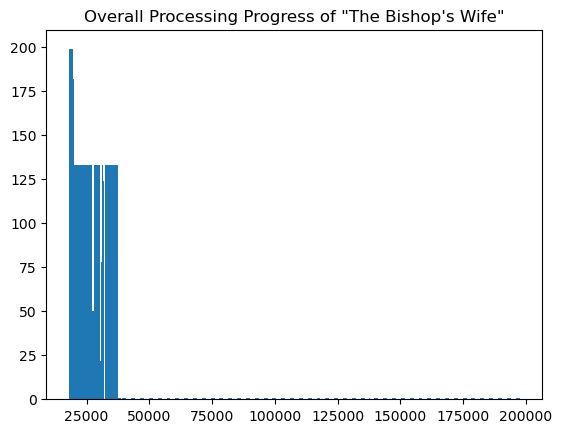

In [9]:
plt.hist(
    frame_idx_timeline,
    bins=15*60 # for every interval of ~15 seconds
)
plt.title(f'Overall Processing Progress of "{title}"')

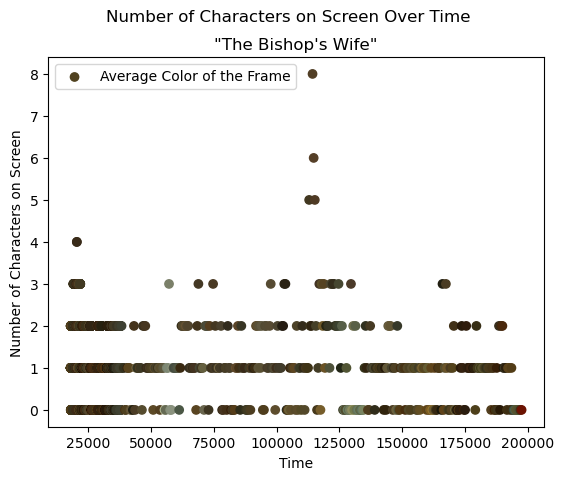

In [14]:
plt.scatter(frame_idx_timeline, num_faces_timeline, c=np.array(color_timeline)/255, label='Average Color of the Frame')

# an obvious artifact seen in this figure is the overlapping of the lines
# this means that the camera was shooting around, and captured fewer people in some shots, whith more or all the characters in other shots
# this could be fixed by sliding a window over time to get the number of people in a scene rather than in a frame

plt.suptitle('Number of Characters on Screen Over Time')
plt.title(f'"{title}"')
plt.xlabel('Time')
plt.ylabel('Number of Characters on Screen')
plt.legend()
None

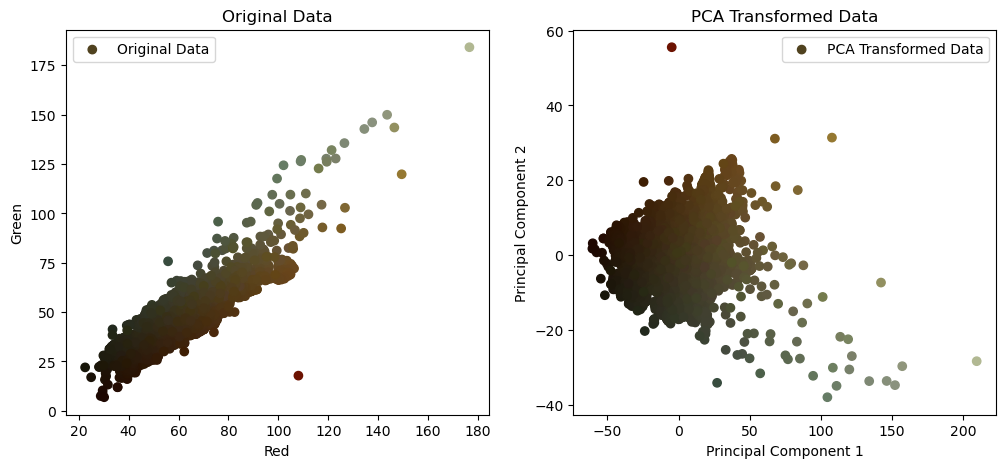

In [11]:
import numpy as np
from sklearn.decomposition import PCA

X = np.concatenate([
    color_timeline,
    # np.array(num_faces_timeline)[:,np.newaxis],
    # np.array(frame_idx_timeline)[:,np.newaxis]
], axis=1)

# Initialize PCA with 2 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot the original data
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], color=color_timeline/255, label='Original Data')
plt.title('Original Data')
plt.xlabel('Red')
plt.ylabel('Green')
plt.legend()

# Transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color=color_timeline/255, label='PCA Transformed Data')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

In [36]:
X_pca[:, 2]

array([-4.00746776, -3.88438607, -3.8588419 , ..., -4.71410496,
        1.07389728, 22.73522423])

In [41]:
X.shape

(10597, 3)

In [43]:
 np.array(num_faces_timeline).shape

(10597,)

In [9]:
from contextlib import closing
